In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, Dropout, concatenate

# Training

In [2]:
# Load the training data
train_data = pd.read_csv('train.csv')

In [8]:
# Tokenize the text data
max_words = 5000
max_len = 200

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(train_data['ABSTRACT'].values)
X_abstract = tokenizer.texts_to_sequences(train_data['ABSTRACT'].values)
X_abstract = sequence.pad_sequences(X_abstract, maxlen=max_len)

tokenizer.fit_on_texts(train_data['TITLE'].values)
X_title = tokenizer.texts_to_sequences(train_data['TITLE'].values)
X_title = sequence.pad_sequences(X_title, maxlen=max_len)

X = np.concatenate((X_title, X_abstract), axis=1)
X

array([[   0,    0,    0, ...,   68,    8,   60],
       [   0,    0,    0, ...,   31,  337, 2461],
       [   0,    0,    0, ...,    1, 1037, 2746],
       ...,
       [   0,    0,    0, ...,    1, 3277, 2287],
       [   0,    0,    0, ...,    5,  189,  873],
       [   0,    0,    0, ...,    4, 1574, 2144]])

In [5]:
# Split data into training and validation sets
y = train_data.drop(['ID', 'TITLE', 'ABSTRACT'], axis=1).values
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:

# Define the model
model = Sequential()
model.add(Embedding(max_words, 128, input_length=max_len*2))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(6, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [25]:
# Train the model
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=5, batch_size=64)

Epoch 1/5
263/263 [==============================] - 444s 2s/step - loss: 0.0852 - accuracy: 0.8354 - val_loss: 0.2953 - val_accuracy: 0.7161
Epoch 2/5
263/263 [==============================] - 460s 2s/step - loss: 0.0739 - accuracy: 0.8416 - val_loss: 0.3034 - val_accuracy: 0.7199
Epoch 3/5
263/263 [==============================] - 468s 2s/step - loss: 0.0650 - accuracy: 0.8481 - val_loss: 0.3289 - val_accuracy: 0.7161
Epoch 4/5
263/263 [==============================] - 472s 2s/step - loss: 0.0563 - accuracy: 0.8449 - val_loss: 0.3559 - val_accuracy: 0.7128
Epoch 5/5
263/263 [==============================] - 473s 2s/step - loss: 0.0512 - accuracy: 0.8527 - val_loss: 0.3744 - val_accuracy: 0.6992


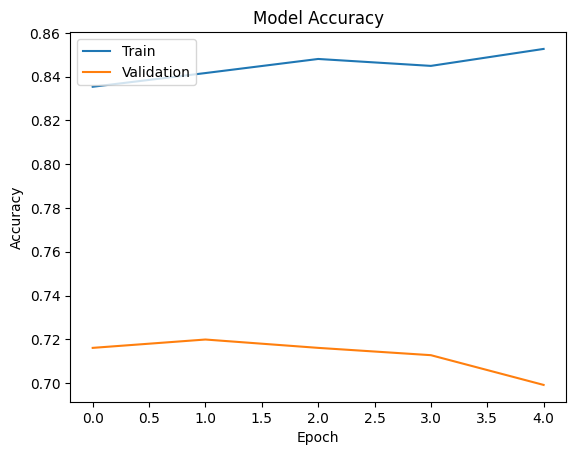

In [26]:
import matplotlib.pyplot as plt

# Plot training accuracy vs. epochs
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [27]:
 # save the model
model.save('my_model_final.h5')


# Prediction

In [10]:
# Load the test data
test_data = pd.read_csv('test.csv')

In [15]:
# Tokenize the text data
max_words = 5000
max_len = 200

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(test_data['ABSTRACT'].values)
X_abstract = tokenizer.texts_to_sequences(test_data['ABSTRACT'].values)
X_abstract = sequence.pad_sequences(X_abstract, maxlen=max_len)

tokenizer.fit_on_texts(test_data['TITLE'].values)
X_title = tokenizer.texts_to_sequences(test_data['TITLE'].values)
X_title = sequence.pad_sequences(X_title, maxlen=max_len)

test_X = np.concatenate((X_title, X_abstract), axis=1)

In [16]:
# Make predictions
y_pred = model.predict(test_X)

# Round the predictions to the nearest integer
y_pred = np.round(y_pred).astype(int)

281/281 [==============================] - 18s 63ms/step


In [17]:
# Create a dataframe of the predictions
submission_df = pd.DataFrame(y_pred, columns=['Computer Science', 'Physics', 'Mathematics', 'Statistics', 'Quantitative Biology', 'Quantitative Finance'])

In [18]:
# Add the ID column from the test data to the dataframe
submission_df.insert(0, 'ID', test_data['ID'])

In [19]:
# Save the dataframe to a CSV file
submission_df.to_csv('submission_final.csv', index=False)